In [2]:
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pylab as plt


from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold,train_test_split, cross_val_score, GridSearchCV, KFold #GridSearch is for hyperparameter tuning
from sklearn.preprocessing import StandardScaler,OneHotEncoder, MinMaxScaler, LabelEncoder, FunctionTransformer, label_binarize
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, f1_score, accuracy_score, precision_score, recall_score, PrecisionRecallDisplay, RocCurveDisplay, make_scorer, mean_squared_error,classification_report,confusion_matrix,ConfusionMatrixDisplay, roc_curve, auc,roc_auc_score
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1/main/Datasets/Fraud_Detection_Dataset.csv')

In [4]:
df.head()

,Transaction ID,Customer ID,Transaction Amount,Transaction Date and Time,Merchant Category,Location,Previous Transaction Amount,Time Since Last Transaction,Device Type,Fraud
0,1,4174,659.297095,2023-01-01 00:00:00,Clothing,Los Angeles,579.323704,481.377516,desktop,No
1,2,4507,474.046452,2023-01-01 00:01:00,Dining,Houston,407.220271,1159.211075,desktop,No
2,3,1860,498.819570,2023-01-01 00:02:00,Dining,San Francisco,265.583605,720.677284,desktop,No
3,4,2294,744.199592,2023-01-01 00:03:00,Electronics,Los Angeles,1097.259081,1.000000,mobile,No
4,5,2130,279.181247,2023-01-01 00:04:00,Electronics,Los Angeles,238.389682,1378.958721,mobile,No


In [7]:
df['Transaction Date and Time'].describe()

count                   10000
unique                  10000
top       2023-01-01 00:00:00
freq                        1
Name: Transaction Date and Time, dtype: object

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction ID               10000 non-null  int64  
 1   Customer ID                  10000 non-null  int64  
 2   Transaction Amount           10000 non-null  float64
 3   Transaction Date and Time    10000 non-null  object 
 4   Merchant Category            10000 non-null  object 
 5   Location                     10000 non-null  object 
 6   Previous Transaction Amount  10000 non-null  float64
 7   Time Since Last Transaction  10000 non-null  float64
 8   Device Type                  10000 non-null  object 
 9   Fraud                        10000 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 781.4+ KB


STEP 01: EDA (Exploratory Analysis)

In [10]:
# group by customer id and sum the transaction amount
df.groupby('Customer ID')['Transaction Amount'].transform('sum')

0       1317.991869
1       4797.703830
2       1131.022316
3       2178.332241
4        939.126011
           ...     
9995    2208.583330
9996    2169.854891
9997    1930.703250
9998     548.858572
9999     699.334906
Name: Transaction Amount, Length: 10000, dtype: float64

In [13]:
# add the total transaction amount to the dataframe 
df['Total Transaction Amount'] = df.groupby('Customer ID')['Transaction Amount'].transform('sum')

In [14]:
df.describe()

,Transaction ID,Customer ID,Transaction Amount,Previous Transaction Amount,Time Since Last Transaction,Total Transaction Amount
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,3010.561100,559.865608,461.410984,677.040726,1968.451818
std,2886.89568,1152.371939,399.984400,334.582413,432.386769,1167.444318
min,1.00000,1000.000000,1.000000,0.000000,1.000000,1.000000
25%,2500.75000,2001.750000,262.969956,181.109688,295.523894,1096.812567
50%,5000.50000,3004.000000,522.370941,404.367010,653.143168,1779.927572
75%,7500.25000,4010.000000,788.415931,676.079655,1048.479972,2599.559621
max,10000.00000,4999.000000,2953.394492,1500.000000,1694.715674,7012.320428


<Axes: ylabel='Transaction Amount'>

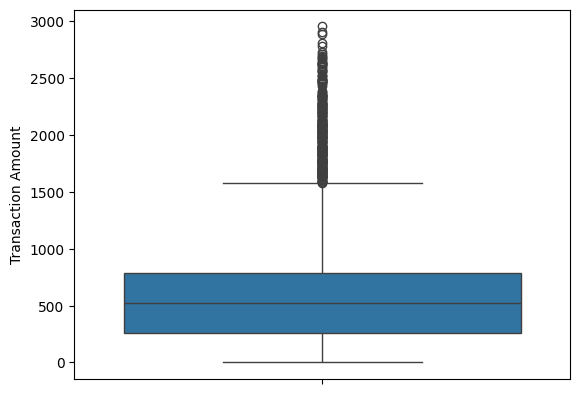

In [19]:
sns.boxplot(data=df, y='Transaction Amount')

In [18]:
df.duplicated().sum()

0

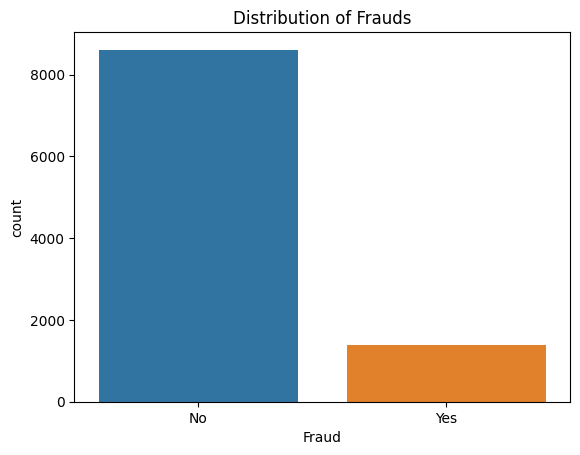

In [20]:
sns.countplot(x='Fraud', data=df, hue='Fraud', legend=False)
plt.title('Distribution of Frauds')
plt.show()

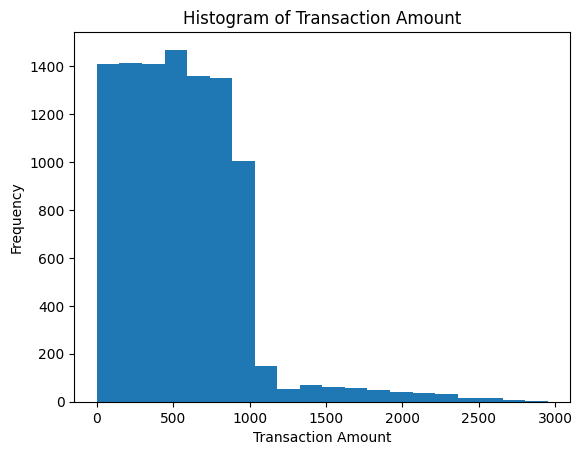

In [21]:
# plot the histogram of transaction amount
plt.hist(df['Transaction Amount'], bins=20)
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Transaction Amount')
plt.show()

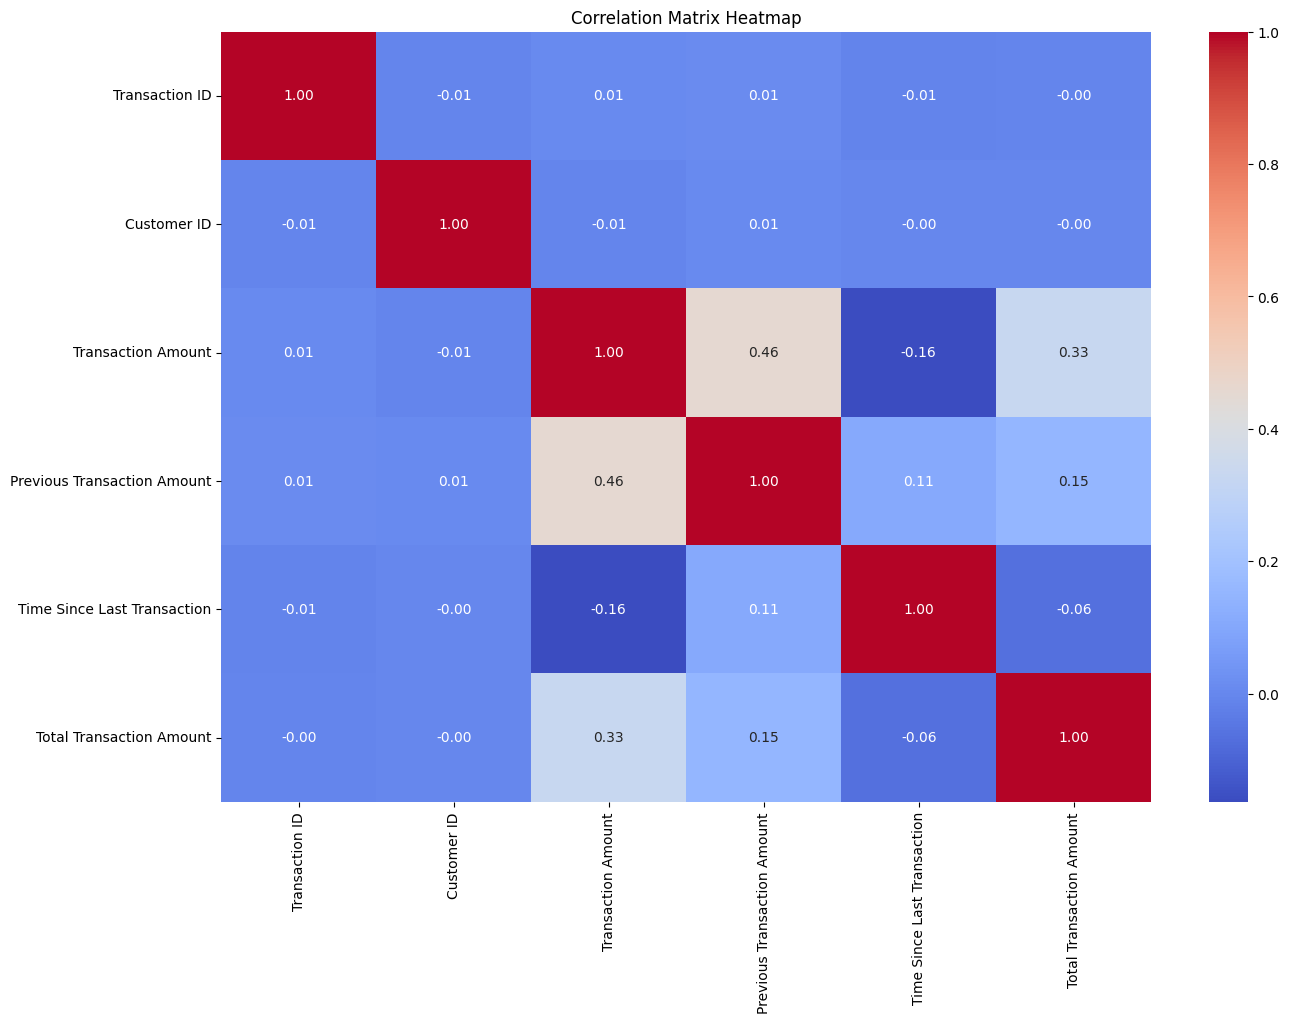

In [22]:
# plot the histogram of total transaction amount
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [26]:
# plot the histogram of total transaction amount
df['Transaction Date and Time'] = pd.to_datetime(df['Transaction Date and Time'])
df['Transaction Month'] = df['Transaction Date and Time'].dt.to_period('M')
monthly_total_transaction = df.groupby('Transaction Month')['Transaction Amount'].sum()

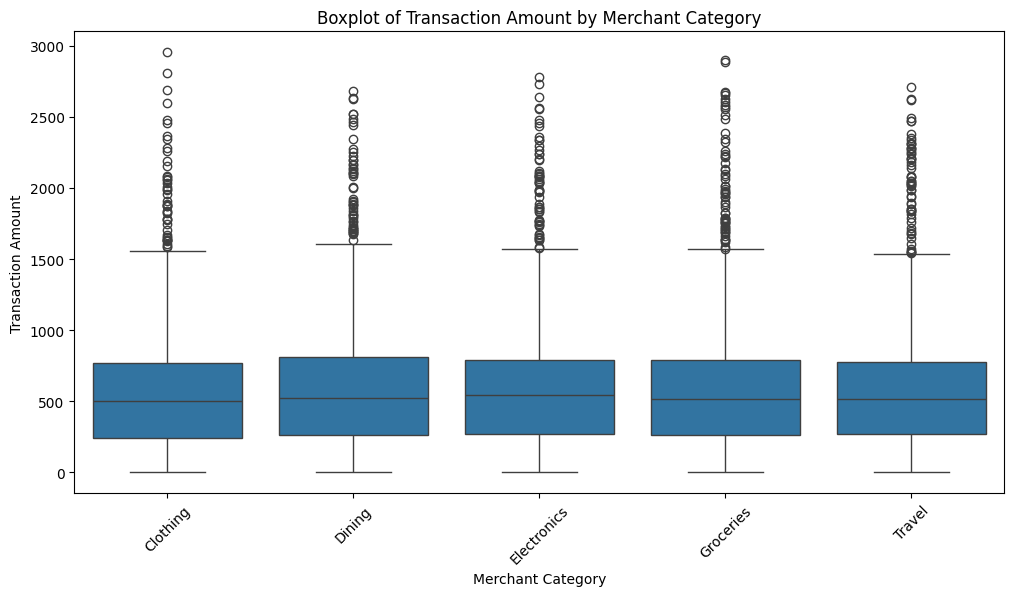

In [29]:
# plot the histogram of total transaction amount
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Merchant Category', y='Transaction Amount')
plt.xlabel('Merchant Category')
plt.ylabel('Transaction Amount')
plt.title('Boxplot of Transaction Amount by Merchant Category')
plt.xticks(rotation=45)
plt.show()


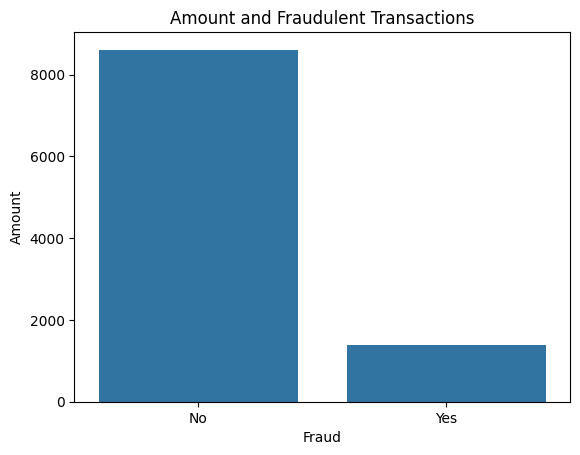

In [37]:
import seaborn as sns

import matplotlib.pyplot as plt

sns.countplot(x='Fraud', data=df)
plt.xlabel('Fraud')
plt.ylabel('Amount')
plt.title('Amount and Fraudulent Transactions')
plt.show()

In [124]:
# Check the column names in the dataframe
print(df.columns)


Index(['Transaction ID', 'Customer ID', 'Transaction Amount',
       'Transaction Date and Time', 'Merchant Category', 'Location',
       'Previous Transaction Amount', 'Time Since Last Transaction',
       'Device Type', 'Fraud', 'Total Transaction Amount', 'Transaction Month',
       'Transaction Amount Category', 'customer_lifespan', 'LTV Category',
       'LTV_cat'],
      dtype='object')


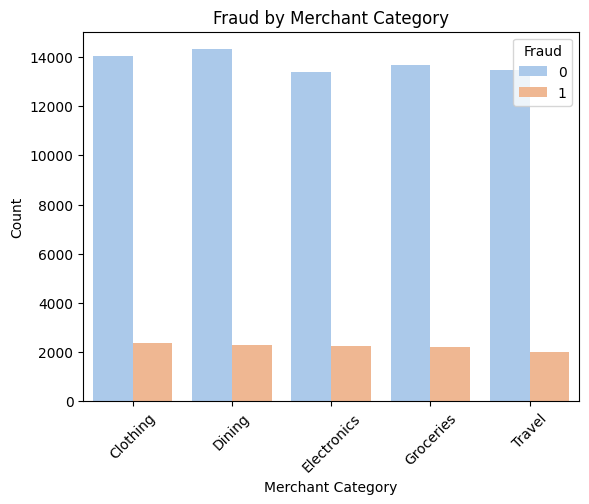

In [125]:
sns.countplot(x='Merchant Category', hue='Fraud', data=df, palette='pastel')
plt.title('Fraud by Merchant Category')
plt.xlabel('Merchant Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

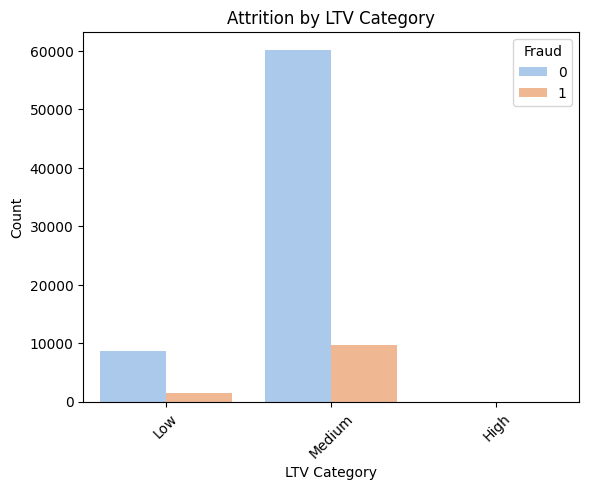

In [127]:
sns.countplot(x='LTV_cat', hue='Fraud', data=df, palette='pastel')
plt.title('Attrition by LTV Category')
plt.xlabel('LTV Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Hypothesis: The transaction amount and previous transaction amount are important features in predicting fraud. Higher transaction amounts and significant changes in previous transaction amounts may indicate a higher likelihood of fraud.

STEP 02: FEATURE ENGINEERING & DATA TRANSFORMATIONS 

In [38]:
# convert the Fraud column to binary
df['Fraud'] = df['Fraud'].map({'Yes': 1, 'No': 0})

In [40]:
# plot the histogram of transaction amount
percentile_99 = df['Transaction Amount'].quantile(0.99)

In [42]:
# replace the transaction amount with the 99th percentile value if it is greater than the 99th percentile value
df['Transaction Amount'] = df['Transaction Amount'].apply(lambda x: min(x, percentile_99))

In [43]:
# Define the bins and labels
bins = [0, 500, 1000, 1500, 2000, np.inf]
labels = ['0-500', '501-1000', '1001-1500', '1501-2000', '2000+']

# Apply the binning to the 'Transaction Amount' column
df['Transaction Amount Category'] = pd.cut(df['Transaction Amount'], bins=bins, labels=labels)

# Display the updated dataframe
df.head()

,Transaction ID,Customer ID,Transaction Amount,Transaction Date and Time,Merchant Category,Location,Previous Transaction Amount,Time Since Last Transaction,Device Type,Fraud,Total Transaction Amount,Transaction Month,Transaction Amount Category
0,1,4174,659.297095,2023-01-01 00:00:00,Clothing,Los Angeles,579.323704,481.377516,desktop,0,1317.991869,2023-01,501-1000
1,2,4507,474.046452,2023-01-01 00:01:00,Dining,Houston,407.220271,1159.211075,desktop,0,4797.703830,2023-01,0-500
2,3,1860,498.819570,2023-01-01 00:02:00,Dining,San Francisco,265.583605,720.677284,desktop,0,1131.022316,2023-01,0-500
3,4,2294,744.199592,2023-01-01 00:03:00,Electronics,Los Angeles,1097.259081,1.000000,mobile,0,2178.332241,2023-01,501-1000
4,5,2130,279.181247,2023-01-01 00:04:00,Electronics,Los Angeles,238.389682,1378.958721,mobile,0,939.126011,2023-01,0-500


In [44]:
# Display the value counts of the 'Transaction Amount Category' column
df['Transaction Amount Category'] = pd.cut(df['Transaction Amount'], bins=bins, labels=labels, right=False)
df['Transaction Amount Category'].value_counts()

Transaction Amount Category
0-500        4809
501-1000     4469
1001-1500     414
1501-2000     176
2000+         132
Name: count, dtype: int64

In [46]:
# Display the value counts of the 'Transaction Amount Category' column
df['Transaction Month'] = df['Transaction Month'].dt.to_timestamp()
df['customer_lifespan'] = df['Transaction Date and Time'] - df['Transaction Month']

In [50]:
# defining LTV bins and labels
ltv_bins = [0, 7134.53, 10324.62, float('inf')]
ltv_labels = ['Low', 'Medium', 'High']

In [51]:
# Create the LTV_cat column in the df DataFrame
df['LTV_cat'] = pd.cut(df['Total Transaction Amount'], bins=ltv_bins, labels=ltv_labels, right=False)

In [53]:
# display the value counts of the LTV_cat column 
summary = df.groupby('Merchant Category')['Fraud'].agg(['sum', 'count'])

In [57]:
# Calculate the percentage of fraudulent transactions
summary['Output_Percentage'] = (summary['sum'] / summary['count']) * 100


In [58]:
# show the output percentage
print(summary[['Output_Percentage']])

                   Output_Percentage
Merchant Category                   
Clothing                   14.571150
Dining                     13.866153
Electronics                14.322251
Groceries                  13.817448
Travel                     12.984997


Hypothesis: The transaction amount and previous transaction amount are important features in predicting fraud. Higher transaction amounts and significant changes in previous transaction amounts may indicate a higher likelihood of fraud.

STEP 03: MODELING (MODEL BUILDING)

In [63]:
# Split data for modeling 

X = df[['Transaction ID', 'Customer ID', 'Transaction Amount', 'Transaction Date and Time', 'Merchant Category', 'Location', 'Previous Transaction Amount', 'Time Since Last Transaction', 'Device Type', 'Total Transaction Amount', 'Transaction Month', 'Transaction Amount Category', 'customer_lifespan']]
y = df['LTV_cat']

numeric_columns = ['Transaction Amount', 'Previous Transaction Amount', 'Time Since Last Transaction', 'Total Transaction Amount', 'customer_lifespan']
categorical_columns = ['Merchant Category', 'Location', 'Device Type', 'Transaction Amount Category']



In [64]:
# reserve 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

# create a pre-processing pipeline which includes the steps of Scaling numeric variables and encoding categoricals
preprocessor = ColumnTransformer(
    transformers=[
        ('num',MinMaxScaler(), numeric_columns),
        ('cat',OneHotEncoder(handle_unknown='ignore',sparse_output=False),categorical_columns)
    ]
)

In [67]:
# List of models to evaluate
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}


In [117]:

    # Create the preprocessor
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_columns),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
        ]
    )

In [120]:
# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Evaluate each model using cross-validation
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    scores = cross_val_score(pipeline, X_train, y_train_encoded, scoring='f1_weighted', cv=3, n_jobs=-1)
    print(f"{name} F1 Scores (weighted): {scores.mean():.3f} ± {scores.std():.3f}")


BayesianRidge F1 Scores (weighted): nan ± nan
DecisionTreeClassifier F1 Scores (weighted): 0.334 ± 0.000
GaussianNB F1 Scores (weighted): 0.444 ± 0.078
GradientBoostingClassifier F1 Scores (weighted): 0.333 ± 0.000
KNN F1 Scores (weighted): 0.392 ± 0.001
RandomForestClassifier F1 Scores (weighted): 0.500 ± 0.000
SVC F1 Scores (weighted): 0.389 ± 0.079


In [78]:
# Evaluate each model using cross-validation

# Check the distribution of the target variable
print(y_train.value_counts())

# If the target variable has only one class, modify the data to include multiple classes
if len(y_train.unique()) < 2:
    # Modify the data to include multiple classes
    duplicated_X_train = pd.concat([X_train] * 2, ignore_index=True)
    duplicated_y_train = pd.concat([y_train] * 2, ignore_index=True)
    duplicated_y_train.iloc[len(y_train):] = 'High' 

    # Update the training data
    X_train = duplicated_X_train
    y_train = duplicated_y_train

# Evaluate each model using cross-validation
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    scores = cross_val_score(pipeline, X_train, y_train, scoring='f1_weighted', cv=3, n_jobs=-1)
    print(f"{name} F1 Scores (weighted): {scores.mean():.3f} ± {scores.std():.3f}")


LTV_cat
Low       7000
Medium       0
High         0
Name: count, dtype: int64
Logistic Regression F1 Scores (weighted): 0.333 ± 0.000
KNN F1 Scores (weighted): 0.395 ± 0.003
Naive Bayes F1 Scores (weighted): 0.444 ± 0.078
Decision Tree F1 Scores (weighted): 0.333 ± 0.000
Random Forest F1 Scores (weighted): 0.500 ± 0.000
SVM F1 Scores (weighted): 0.389 ± 0.079


In [121]:
# Check the current distribution of values in the LTV_cat column
print(df['LTV_cat'].value_counts())

# Duplicate rows with medium and high values
duplicated_df = pd.concat([df] * 2, ignore_index=True)
duplicated_df['LTV_cat'].iloc[len(df):] = 'Medium'  # Modify the duplicated rows to have medium values
duplicated_df['LTV_cat'].iloc[len(df)*2:] = 'High'  # Modify the duplicated rows to have high values

# Update the df DataFrame with the modified data
df = duplicated_df

# Check the updated distribution of values in the LTV_cat column
print(df['LTV_cat'].value_counts())

LTV_cat
Medium    30000
Low       10000
High          0
Name: count, dtype: int64
LTV_cat
Medium    70000
Low       10000
High          0
Name: count, dtype: int64


C:\Users\aayre\AppData\Local\Temp\ipykernel_17164\2710633602.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  duplicated_df['LTV_cat'].iloc[len(df):] = 'Medium'  # Modify the duplicated rows to have medium values
C:\Users\aayre\AppData\Lo

In [122]:
# Binary Log Reg Pipeline

# Define the Logistic Regression model with adjusted hyperparameters
logreg = LogisticRegression(max_iter=1000, C=0.1, penalty='l2')

# Create the full pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', logreg)
])

# Fit the model to the training data
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       0.00      0.00      0.00       0.0
         Low       0.00      0.00      0.00    3000.0

    accuracy                           0.00    3000.0
   macro avg       0.00      0.00      0.00    3000.0
weighted avg       0.00      0.00      0.00    3000.0



C:\Users\aayre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aayre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aayre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:15

C:\Users\aayre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aayre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aayre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:15

Classification Report:
               precision    recall  f1-score   support

        High       0.00      0.00      0.00       0.0
         Low       0.00      0.00      0.00    3000.0

    accuracy                           0.00    3000.0
   macro avg       0.00      0.00      0.00    3000.0
weighted avg       0.00      0.00      0.00    3000.0

Accuracy: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00


C:\Users\aayre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


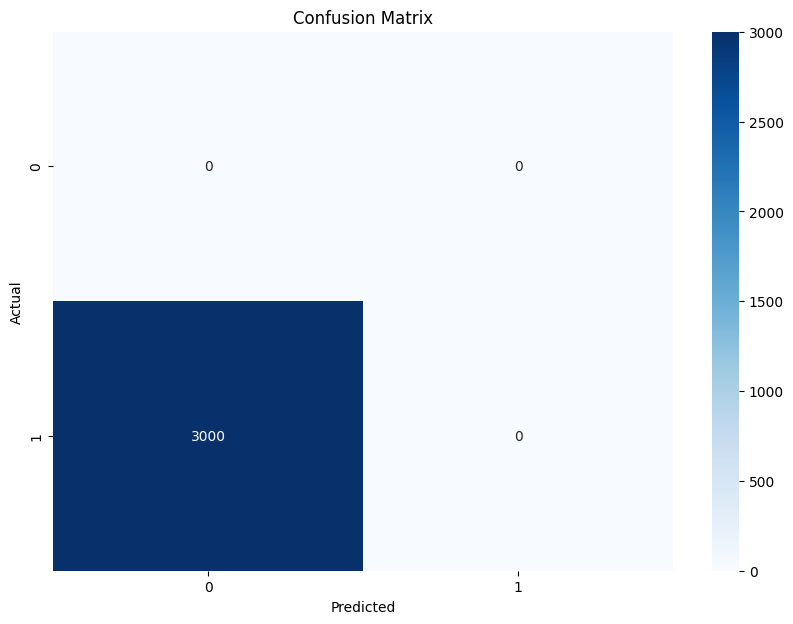

In [80]:
# Logreg Pipeline - Multi-Class

logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

logreg_pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = logreg_pipeline.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred) 
print("Classification Report:\n", report)

# Compute and print individual metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


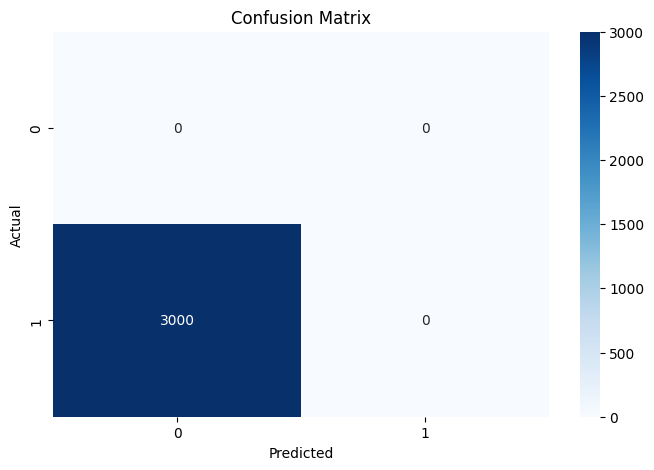

In [83]:
# KNN
KNN = KNeighborsClassifier()

# Create the full pipeline
# Convert 'customer_lifespan' column to numeric data type
X_train['customer_lifespan'] = X_train['customer_lifespan'].dt.total_seconds()
X_test['customer_lifespan'] = X_test['customer_lifespan'].dt.total_seconds()

# Fit the model to the training data
pipeline.fit(X_train, y_train)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

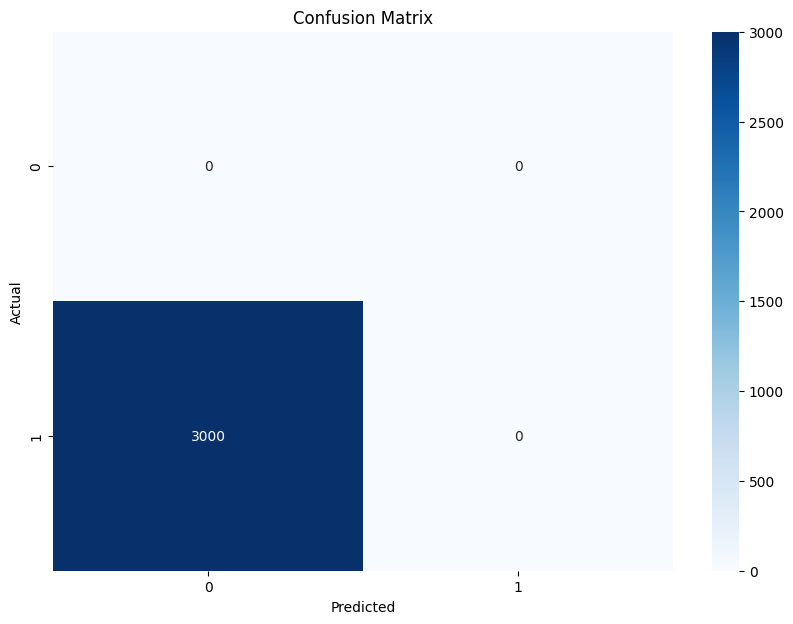

In [85]:
# Random Forest

# Define the preprocessor with OneHotEncoder for categorical features and MinMaxScaler for numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ]
)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Create a pipeline with the preprocessor and a RandomForestClassifier
# Convert 'customer_lifespan' column to numeric data type
X_train['customer_lifespan'] = X_train['customer_lifespan'].dt.total_seconds()
X_test['customer_lifespan'] = X_test['customer_lifespan'].dt.total_seconds()

# Fit the model
pipeline_rforest_rev.fit(X_train, y_train)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [86]:
# Grid Search Params for All Models:

param_grids = {
    'Logistic Regression': {
        'classifier__C': [0.1, 1, 10],
        'classifier__solver': ['lbfgs', 'liblinear']
    },
    'KNN': {
        'classifier__n_neighbors': [3, 5, 7],
        'classifier__weights': ['uniform', 'distance']
        # 'classifier__metric': ['euclidean', 'manhattan', 'minkowski']  # Common distance metrics ---MAY NOT NEED TO USE
    },
    'Naive Bayes': {
        # GaussianNB doesn't have hyperparameters typically tuned via GridSearch
    },
    'Decision Tree': {
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10]
    },
    'Random Forest': {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__max_depth': [None, 10, 20, 30]
    },
    'SVM': {
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf']
    }
}

In [130]:
def run_grid_search(pipeline, param_grid, X_train, y_train):
    
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_estimator = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    return best_estimator, best_params, best_score

In [131]:

selected_model = RandomForestClassifier()  
param_grid = {
    'classifier__n_estimators': [100, 200, 300],  
    'classifier__max_depth': [None, 10, 20, 30]
}

# Create a pipeline with the selected model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', selected_model)
])

# Run grid search
best_estimator, best_params, best_score = run_grid_search(pipeline, param_grid, X_train, y_train)

print("Best Estimator:", best_estimator)
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Estimator: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Transaction Amount',
                                                   'Previous Transaction '
                                                   'Amount',
                                                   'Time Since Last '
                                                   'Transaction',
                                                   'Total Transaction Amount',
                                                   'customer_lifespan']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Merchant Category',
                                                   'Location', 'Device Type',
                                                   'Transaction Amount '
        

In [132]:
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Transaction Amount',
                                                   'Previous Transaction '
                                                   'Amount',
                                                   'Time Since Last '
                                                   'Transaction',
                                                   'Total Transaction Amount',
                                                   'customer_lifespan']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Merchant Category',
                                                   'Location', 'Device Type',
                                                   'Transaction Amount '
                                                   'Category'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=20, n_estimators=300))])

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Transaction Amount',
                                                   'Previous Transaction '
                                                   'Amount',
                                                   'Time Since Last '
                                                   'Transaction',
                                                   'Total Transaction Amount',
                                                   'customer_lifespan']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Merchant Category',
                                                   'Location', 'Device Type',
                                                   'Transaction Amount '
                                                   'Category'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=20, n_estimators=300))])

In [133]:
{'classifier__max_depth': 20, 'classifier__n_estimators': 300}

{'classifier__max_depth': 20, 'classifier__n_estimators': 300}

In [134]:
from sklearn.model_selection import cross_val_score

# Evaluate each model using cross-validation
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    scores = cross_val_score(pipeline, X_train, y_train_encoded, scoring='f1_weighted', cv=3, n_jobs=-1)
    print(f"{name} F1 Scores (weighted): {scores.mean():.3f} ± {scores.std():.3f}")


BayesianRidge F1 Scores (weighted): nan ± nan
DecisionTreeClassifier F1 Scores (weighted): 0.334 ± 0.000
GaussianNB F1 Scores (weighted): 0.444 ± 0.078
GradientBoostingClassifier F1 Scores (weighted): 0.333 ± 0.000
KNN F1 Scores (weighted): 0.392 ± 0.001
RandomForestClassifier F1 Scores (weighted): 0.500 ± 0.000
SVC F1 Scores (weighted): 0.389 ± 0.079
